# An attempt to teach myself aspects of K Neighbors Regression and the use of Mean Squared Error using a cars database. 

In [3]:
import pandas as pd
import numpy as np
import math
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
pd.options.display.max_columns = 99

In [7]:
cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body style',
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm',
        'city-mpg', 'highway-mpg', 'price']
cars = pd.read_csv('/Users/Carlos/Desktop/imports-85.data', names = cols)

In [8]:
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [9]:
numeric = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'bore', 'stroke',
           'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

In [10]:
numeric_cars = cars[numeric]

In [11]:
numeric_cars.replace('?', np.nan, inplace = True)

/Users/carlos/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4263: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [12]:
numeric_cars = numeric_cars.astype(float)

In [13]:
numeric_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 14 columns):
normalized-losses    164 non-null float64
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null float64
bore                 201 non-null float64
stroke               201 non-null float64
compression-rate     205 non-null float64
horsepower           203 non-null float64
peak-rpm             203 non-null float64
city-mpg             205 non-null float64
highway-mpg          205 non-null float64
price                201 non-null float64
dtypes: float64(14)
memory usage: 22.5 KB


In [14]:
numeric_cars.isnull().sum()

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [15]:
numeric_cars.dropna(subset = ['price'], inplace = True)

In [16]:
numeric_cars.fillna(numeric_cars.mean(), inplace = True)

In [17]:
price = numeric_cars['price']
normalized_cars = (numeric_cars - numeric_cars.min()) / (numeric_cars.max() - numeric_cars.min())
normalized_cars['price'] = price

In [18]:
normalized_cars

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.664286,0.290476,0.12500,0.294393,0.346939,0.222222,0.289474,13495.0
1,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.664286,0.290476,0.12500,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.100000,0.666667,0.12500,0.495327,0.346939,0.166667,0.263158,16500.0
3,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.464286,0.633333,0.18750,0.252336,0.551020,0.305556,0.368421,13950.0
4,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.464286,0.633333,0.06250,0.313084,0.551020,0.138889,0.157895,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0.157068,0.655977,0.711940,0.735043,0.641667,0.567882,0.885714,0.514286,0.15625,0.308411,0.510204,0.277778,0.315789,16845.0
201,0.157068,0.655977,0.711940,0.726496,0.641667,0.605508,0.885714,0.514286,0.10625,0.523364,0.469388,0.166667,0.236842,19045.0
202,0.157068,0.655977,0.711940,0.735043,0.641667,0.591156,0.742857,0.380952,0.11250,0.401869,0.551020,0.138889,0.184211,21485.0
203,0.157068,0.655977,0.711940,0.735043,0.641667,0.670675,0.335714,0.633333,1.00000,0.271028,0.265306,0.361111,0.289474,22470.0


In [19]:
def split_train_test(df, ratio):
    shuffle = np.random.permutation(len(df))
    test_size = int(len(df) * ratio)
    test = shuffle[:test_size]
    train = shuffle[test_size:]
    return df.iloc[train], df.iloc[test]

In [20]:
train_set, test_set = split_train_test(normalized_cars, .5)

In [21]:
def knn_train_test(train_col, test_col, train_df, test_df):
    knn = KNeighborsRegressor()
    np.random.seed(1)
    knn.fit(train_df[[train_col]], train_df[test_col])
    predictions = knn.predict(test_df[[train_col]])
    mse = mean_squared_error(predictions, test_df[test_col])
    rmse = math.sqrt(mse)
    return rmse

In [22]:
rmse = {}
car_final = numeric_cars.columns.drop('price')
for col in car_final:
    rmse_values = knn_train_test(col, 'price', train_set, test_set)
    rmse[col] = rmse_values

In [23]:
rmse

{'normalized-losses': 7345.816860118417,
 'wheel-base': 6525.680321866831,
 'length': 5653.50522168327,
 'width': 5388.87392455975,
 'height': 8072.675030793695,
 'curb-weight': 4412.860165606882,
 'bore': 5989.569690720695,
 'stroke': 6917.06832431197,
 'compression-rate': 6162.7959259414065,
 'horsepower': 4029.588281599002,
 'peak-rpm': 8609.829676805459,
 'city-mpg': 4172.678427724811,
 'highway-mpg': 4385.8079381568905}

In [24]:
def knn_train_test(train_col, test_col, train_df, test_df):
    kvals = [1,3,5,7,9]
    kvals_rmse = {}
    for k in kvals:
        knn = KNeighborsRegressor(n_neighbors = k)
        np.random.seed(1)
        knn.fit(train_df[[train_col]], train_df[test_col])
        predictions = knn.predict(test_df[[train_col]])
        mse = mean_squared_error(predictions, test_df[test_col])
        rmse = math.sqrt(mse)
        kvals_rmse[k] = rmse
    return kvals_rmse
k_rmse = {}
for col in car_final:
    k_rmse_values = knn_train_test(col, 'price', train_set, test_set)
    k_rmse[col] = k_rmse_values

In [25]:
k_rmse

{'normalized-losses': {1: 7613.653068665527,
  3: 8330.549630259831,
  5: 7345.816860118417,
  7: 6732.240992903524,
  9: 6814.324405776444},
 'wheel-base': {1: 5659.975417791141,
  3: 6251.898324953434,
  5: 6525.680321866831,
  7: 6708.882184166033,
  9: 6891.880606075171},
 'length': {1: 4775.430405733079,
  3: 5300.815188251709,
  5: 5653.50522168327,
  7: 5826.025177597501,
  9: 5860.220738352969},
 'width': {1: 7219.010806197758,
  3: 5443.994195339383,
  5: 5388.87392455975,
  7: 5532.536351181333,
  9: 5465.874404390198},
 'height': {1: 9739.608168709869,
  3: 7946.455095128197,
  5: 8072.675030793695,
  7: 8338.16006031478,
  9: 8474.134748795346},
 'curb-weight': {1: 5243.176467562388,
  3: 4021.534786068069,
  5: 4412.860165606882,
  7: 4298.205914146991,
  9: 4253.375546319028},
 'bore': {1: 10635.32651261822,
  3: 6446.879951228777,
  5: 5989.569690720695,
  7: 6108.101303705311,
  9: 6431.674579726977},
 'stroke': {1: 5959.68236821393,
  3: 6219.81670031807,
  5: 6917.068

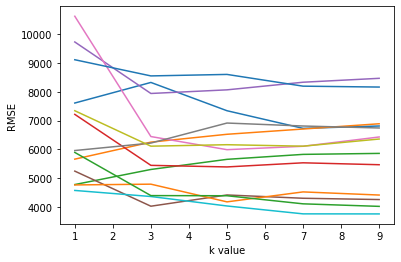

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

for k,v in k_rmse.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')

The knn_train_test functions above were based off of only one column for the train_data. 

What would be presented if we checked the two best values? Three? Four? Five? Six?

We'll also be working with k values ranging from 1 to 25 for observation's sake

To begin, we need to determine what the top 6 values are.

In [27]:
avg_rmse = {}
for k,v in k_rmse.items():
    avg = np.mean(list(v.values()))
    avg_rmse[k] = avg
#convert to series to then sort
avg_rmse_series = pd.Series(avg_rmse)
avg_sorted = avg_rmse_series.sort_values()

In [28]:
avg_sorted

horsepower           4093.451556
curb-weight          4445.830576
city-mpg             4530.688040
highway-mpg          4558.207723
length               5483.199346
width                5810.057936
wheel-base           6407.663371
compression-rate     6418.463432
stroke               6531.028061
bore                 7122.310408
normalized-losses    7367.316992
height               8514.206621
peak-rpm             8531.958090
dtype: float64

The top six values are:

1. Horsepower
2. City-MPG
3. Curb-Weight
4. Width
5. Highway-MPG
6. Length

In [29]:
avg_sorted_six = avg_sorted[:6]

In [42]:
avg_sorted_six

horsepower     4093.451556
curb-weight    4445.830576
city-mpg       4530.688040
highway-mpg    4558.207723
length         5483.199346
width          5810.057936
dtype: float64

In [51]:
avg_df = pd.DataFrame(avg_sorted_six).reset_index().rename(columns = {'index' : 'feature', 0 : 'value'})

In [75]:
def knn_train_tests(train_cols, test_col, train_df, test_df):
    kvals = [i for i in range(1,26)]
    kvals_rmse = {}
    for k in kvals:
        knn = KNeighborsRegressor(n_neighbors = k)
        knn.fit(train_df[train_cols], train_df[test_col])
        predictions = knn.predict(test_df[train_cols])
        mse = mean_squared_error(predictions, test_df[test_col])
        rmse = math.sqrt(mse)
        kvals_rmse[k] = rmse
    return kvals_rmse


#loop through best features number (2 - 6) (horsepower + city, then horsepower + city + curb ....) 
#which then appends that to k_rmse
#then use the same code for graph above to make a new line graph

In [92]:
car_final = numeric_cars.columns.drop('price')
for col in car_final:
    rmse_values = knn_train_test(col, 'price', train_set, test_set)
    rmse[col] = rmse_values
    
k_rmse_multiple = {}
j=2
for row in range(0, (len(avg_df))):
    if j<7:
        features = avg_df['feature'].iloc[0:j].to_list()
        k_rmse_values = knn_train_tests(features, 'price', train_set, test_set)
        k_rmse_multiple[j] = k_rmse_values
        j+=1

In [93]:
k_rmse_multiple

{2: {1: 4100.378032572119,
  2: 3481.0789114152526,
  3: 3413.4429280908344,
  4: 3522.3182123070596,
  5: 3556.4606851194067,
  6: 3218.225876464305,
  7: 3321.4431018729792,
  8: 3436.4248601835457,
  9: 3481.727547310918,
  10: 3596.141235324331,
  11: 3715.596265942736,
  12: 3772.538199119983,
  13: 3759.225277301556,
  14: 3715.919569197495,
  15: 3755.9742385402187,
  16: 3825.009969370178,
  17: 3688.0266349645053,
  18: 3738.096632452053,
  19: 3764.103488319048,
  20: 3872.431893923378,
  21: 3945.3482020126835,
  22: 3982.091747630834,
  23: 4031.828288255036,
  24: 4114.765940139902,
  25: 4136.5390295289135},
 3: {1: 4044.0667217542295,
  2: 3394.2411228432197,
  3: 3369.8667652528275,
  4: 3526.135093838578,
  5: 3581.814922410146,
  6: 3206.80601563993,
  7: 3245.9389185345344,
  8: 3436.029543219179,
  9: 3517.868029217079,
  10: 3604.437806024679,
  11: 3710.814572601467,
  12: 3806.035762981901,
  13: 3764.692337186219,
  14: 3735.0894889492515,
  15: 3796.94305486224

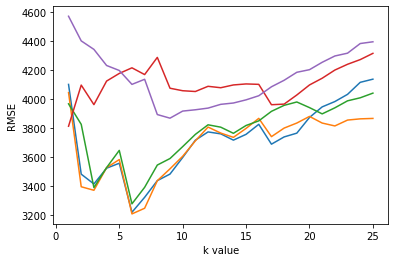

In [94]:
for k,v in k_rmse_multiple.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')